Solar calculator (zenith angle, time...)
==
***

**DaViTpy** comes with a solar calculator ported to python from javascript (<http://www.esrl.noaa.gov/gmd/grad/solcalc/index.html>).
However, Basemap v1.0.2 or newer comes with a `nightshade` method which lets you plot the day-night terminator.

This Notebook demonstrates different ways of visualizing the day-night terminator on a map.

In [1]:
%pylab inline
from davitpy.pydarn import *
from davitpy.utils import *
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
date = datetime.utcnow()
lats, lons, zen, term = calcTerminator( date, [20.,90.], [-180.,180.] )

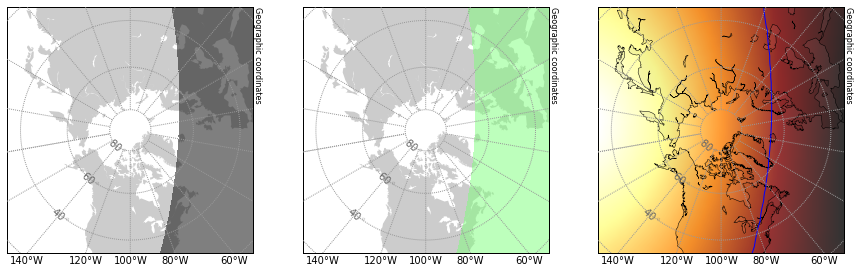

In [3]:
# setup map projection and decorations
figure(figsize=(15,8))
subplot(131)
myMap = plotUtils.mapObj(boundinglat=30., gridLabels=True)
# overplot terminator
myMap.nightshade(date)

# plot calculated zenith data
subplot(132)
myMap = plotUtils.mapObj(boundinglat=30., gridLabels=True)
ny = zen.shape[0]; nx = zen.shape[1]
zendat, x, y = myMap.transform_scalar(zen,lons,lats,nx,ny, returnxy=True)
myMap.contourf(x, y, zendat, [90,180], zorder=2, alpha=.5)

# plot calculated zenith data
subplot(133)
myMap = plotUtils.mapObj(boundinglat=30., gridLabels=True)
ny = zen.shape[0]; nx = zen.shape[1]
zendat, x, y = myMap.transform_scalar(zen,lons,lats,nx,ny, returnxy=True)
myMap.imshow(zendat, pylab.cm.afmhot_r, alpha=.8, zorder=1)
x, y = myMap(term[:,1], term[:,0])
myMap.plot(x,y)
myMap.drawcoastlines(linewidth=0.5)